<a href="https://colab.research.google.com/github/Ordep1234555/AulaPratica5/blob/main/Desafio_TecnicoLH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação, primeiros contatos e tratamento

## Importação e definindo df

In [ ]:
!pip install autoviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('teste_indicium_precificacao.csv')
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Analisando informações básicas

In [2]:
df.shape

(48894, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
df.isnull().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [6]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,25409
Private room,22325
Shared room,1160


In [7]:
df['bairro_group'].value_counts()

,count
bairro_group,
Manhattan,21661
Brooklyn,20103
Queens,5666
Bronx,1091
Staten Island,373


In [8]:
df['bairro'].nunique()

221

In [9]:
df.duplicated().sum()

0

## Tratando os dados nulos

In [10]:
df_tratado = df.drop(columns=['host_name']).copy()
df_tratado.loc[:, "nome"] = df_tratado["nome"].fillna("A")
df_tratado.loc[:, "ultima_review"] = df_tratado["ultima_review"].fillna("1900-01-01")
df_tratado.loc[:, "reviews_por_mes"] = df_tratado["reviews_por_mes"].fillna(0)
df_tratado.head()

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1900-01-01,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [11]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48894 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   bairro_group                   48894 non-null  object 
 4   bairro                         48894 non-null  object 
 5   latitude                       48894 non-null  float64
 6   longitude                      48894 non-null  float64
 7   room_type                      48894 non-null  object 
 8   price                          48894 non-null  int64  
 9   minimo_noites                  48894 non-null  int64  
 10  numero_de_reviews              48894 non-null  int64  
 11  ultima_review                  48894 non-null  object 
 12  reviews_por_mes                48894 non-null 

# 1. Análise Exploratória dos Dados (EDA)

## Análise mais detalhada

In [12]:
df_features = df_tratado

convertible_columns = []
non_convertible_columns = []

for col in df_features.columns:
    try:
        df_features[col] = df_features[col].astype(float)
        convertible_columns.append(col)
    except ValueError:
        non_convertible_columns.append(col)

print("Colunas convertiveis para float:", len(convertible_columns))
print(np.sort(convertible_columns))
print()

print("Colunas não convertiveis para float", len(non_convertible_columns))
print(np.sort(non_convertible_columns))

print()

Colunas convertiveis para float: 10
['calculado_host_listings_count' 'disponibilidade_365' 'host_id' 'id'
 'latitude' 'longitude' 'minimo_noites' 'numero_de_reviews' 'price'
 'reviews_por_mes']

Colunas não convertiveis para float 5
['bairro' 'bairro_group' 'nome' 'room_type' 'ultima_review']



In [13]:
cols = [col for col in convertible_columns if col not in ["id", "host_id"]]

print("Estatísticas descritivas das colunas importantes:")
df_stats = df_tratado[cols].describe().T
df_stats['mediana'] = df_features[cols].median()
df_stats['moda'] = df_features[cols].mode().iloc[0]
col_order = ['count', 'mean', 'mediana', 'moda', 'std', 'min', '25%', '50%', '75%', 'max']
df_stats = df_stats[col_order].round(2)
df_stats.sort_values(by='mean', ascending=False)

Estatísticas descritivas das colunas importantes:


,count,mean,mediana,moda,std,min,25%,50%,75%,max
price,48894.0,152.72,106.00,100.00,240.16,0.00,69.00,106.00,175.00,10000.00
disponibilidade_365,48894.0,112.78,45.00,0.00,131.62,0.00,0.00,45.00,227.00,365.00
latitude,48894.0,40.73,40.72,40.72,0.05,40.50,40.69,40.72,40.76,40.91
numero_de_reviews,48894.0,23.27,5.00,0.00,44.55,0.00,1.00,5.00,24.00,629.00
calculado_host_listings_count,48894.0,7.14,1.00,1.00,32.95,1.00,1.00,1.00,2.00,327.00
minimo_noites,48894.0,7.03,3.00,1.00,20.51,1.00,1.00,3.00,5.00,1250.00
reviews_por_mes,48894.0,1.09,0.37,0.00,1.60,0.00,0.04,0.37,1.58,58.50
longitude,48894.0,-73.95,-73.96,-73.96,0.05,-74.24,-73.98,-73.96,-73.94,-73.71


Preços variam bastante

In [14]:
price_by_neighborhood = df_tratado.groupby('bairro_group')['price'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)
print("Preço médio por região:")
print(price_by_neighborhood)

Preço médio por região:
                     mean  median  count         std
bairro_group                                        
Manhattan      196.875814   150.0  21661  291.383183
Brooklyn       124.381983    90.0  20103  186.878105
Staten Island  114.812332    75.0    373  277.620403
Queens          99.517649    75.0   5666  167.102155
Bronx           87.496792    65.0   1091  106.709349


Então Manhattan é simultaneamente a região mais cara e mais popular, provavelmente um bom local para investir desde que tenha um bom capital inicial

## Gráficos

Dados por região

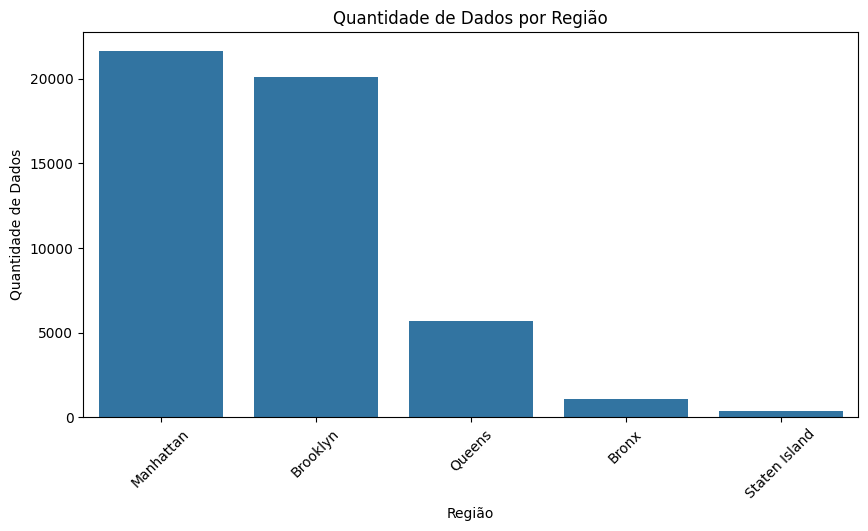

In [15]:
bairro_counts = df_tratado['bairro_group'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=bairro_counts.index, y=bairro_counts.values)
plt.xlabel("Região")
plt.ylabel("Quantidade de Dados")
plt.xticks(rotation=45)
plt.title("Quantidade de Dados por Região")
plt.show()

Dados por tipo de quarto

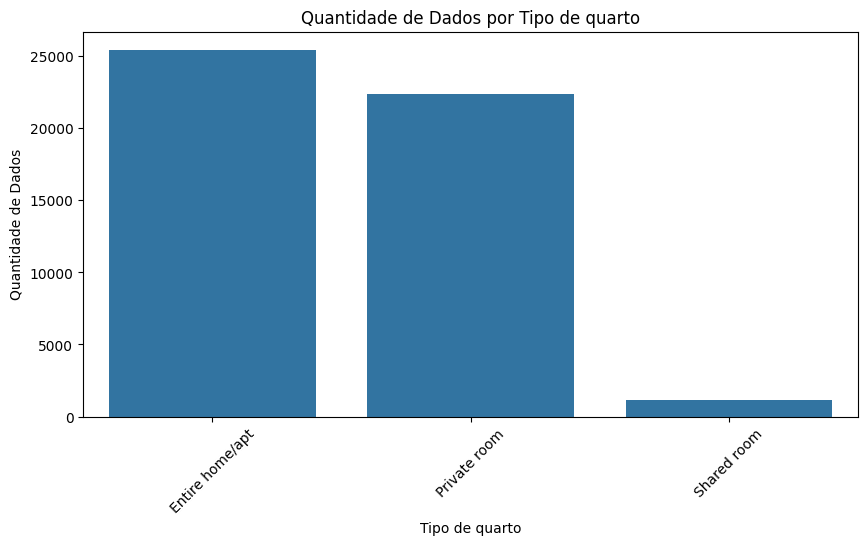

In [16]:
room_type_counts = df_tratado['room_type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel("Tipo de quarto")
plt.ylabel("Quantidade de Dados")
plt.xticks(rotation=45)
plt.title("Quantidade de Dados por Tipo de quarto")
plt.show()

Preço por região

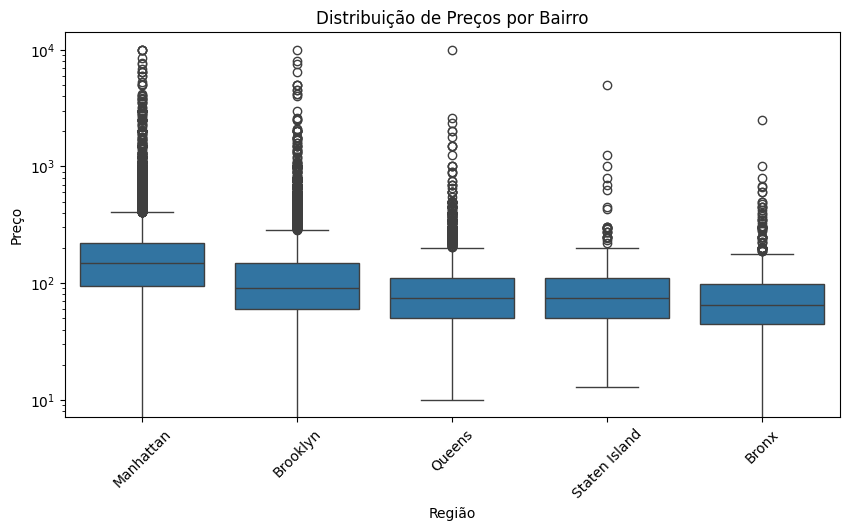

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='bairro_group', y='price', data=df_tratado)
plt.yscale("log")
plt.xlabel("Região")
plt.ylabel("Preço")
plt.xticks(rotation=45)
plt.title('Distribuição de Preços por Bairro')
plt.show()

Preço por tipo de quarto

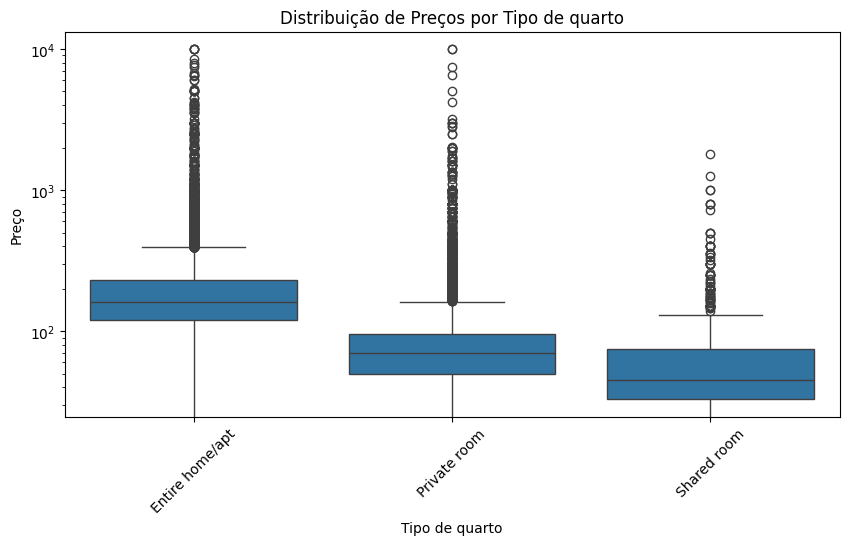

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='room_type', y='price', data=df_tratado)
plt.yscale("log")
plt.xlabel("Tipo de quarto")
plt.ylabel("Preço")
plt.xticks(rotation=45)
plt.title('Distribuição de Preços por Tipo de quarto')
plt.show()

Matriz de correlação

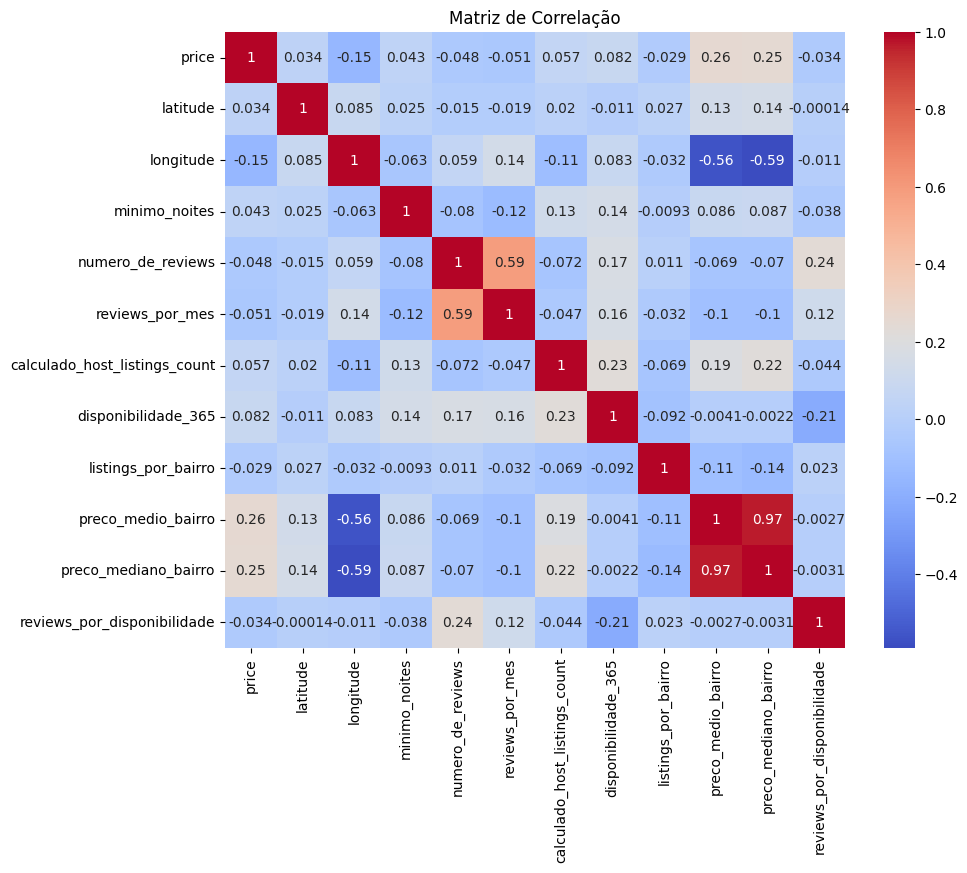

In [19]:
df_corr = df_tratado.copy()

# Variaveis novas
df_corr['listings_por_bairro'] = df_corr.groupby('bairro')['id'].transform('count')
df_corr['preco_medio_bairro'] = df_corr.groupby('bairro')['price'].transform('mean')
df_corr['preco_mediano_bairro'] = df_corr.groupby('bairro')['price'].transform('median')
df_corr['reviews_por_disponibilidade'] = df_corr['numero_de_reviews'] / (df_corr['disponibilidade_365'] + 1)

correlation_matrix = df_corr[['price', 'latitude', 'longitude', 'minimo_noites', 'numero_de_reviews',
                     'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365',
                     'listings_por_bairro', 'preco_medio_bairro', 'preco_mediano_bairro',
                     'reviews_por_disponibilidade']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Sem nenhuma correlação boa para usar com o preço, a melhor sendo disponibilidade no ano

# 2. Respondendo perguntas

## a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [20]:
df_investimento = df_tratado.copy()

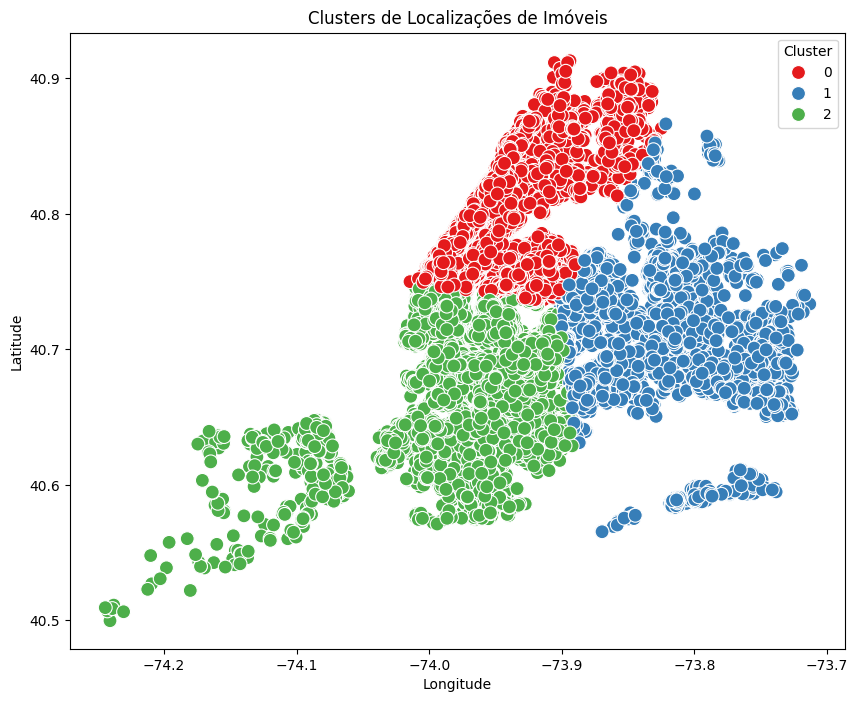

In [21]:
# Preço médio por noite
df_investimento['preco_por_night'] = df_investimento['price'] / df_investimento['minimo_noites']

# Defindo a demanda a partir dos numeros de reviews
df_investimento['demanda'] = df_investimento['numero_de_reviews'] * df_investimento['reviews_por_mes']

# Usando KMeans para encontrar clusters de alta demanda
kmeans = KMeans(n_clusters=3, random_state=42)
df_investimento['cluster'] = kmeans.fit_predict(df_investimento[['latitude', 'longitude']])

# Visualizando os clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_investimento, x='longitude', y='latitude', hue='cluster', palette='Set1', s=100)
plt.title("Clusters de Localizações de Imóveis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Cluster')
plt.show()

In [22]:
# Analisar a relação entre preço e demanda para cada cluster
df_cluster = df_investimento.groupby('cluster').agg({
    'preco_por_night': 'mean',
    'demanda': 'sum',
    'numero_de_reviews': 'sum',
    'disponibilidade_365': 'mean'
}).reset_index()

df_cluster

,cluster,preco_por_night,demanda,numero_de_reviews,disponibilidade_365
0,0,74.268826,1065612.07,376116.0,120.904671
1,1,59.234834,512688.02,108184.0,171.225285
2,2,68.969024,1713878.48,653696.0,100.940504


In [23]:
# Identificando a melhor região atraves do cluster
melhor_cluster = df_cluster.loc[
    (df_cluster['preco_por_night'] < df_cluster['preco_por_night'].quantile(0.75)) &
    (df_cluster['demanda'] > df_cluster['demanda'].quantile(0.75))
]

clusters_recomendados = melhor_cluster['cluster'].tolist()

df_recomendado = df_investimento[df_investimento['cluster'].isin(clusters_recomendados)]

# Contar a frequência dos bairros e regiões nos clusters recomendados
bairros_mais_frequentes = df_recomendado['bairro'].value_counts().head(10)  # Top 10 bairros mais presentes
regiao_mais_frequente = df_recomendado['bairro_group'].value_counts().head(1)  # Top 1 região mais presente

print("Bairros mais presentes no cluster recomendado:")
print(bairros_mais_frequentes)

print("\nRegião mais presente no cluster recomendado:")
print(regiao_mais_frequente)

Bairros mais presentes no cluster recomendado:
bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Bushwick              2465
East Village          1853
Crown Heights         1564
Greenpoint            1115
Lower East Side        911
West Village           768
Financial District     744
Chelsea                690
Name: count, dtype: int64

Região mais presente no cluster recomendado:
bairro_group
Brooklyn    19769
Name: count, dtype: int64


## b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

In [24]:
# Analisando a correlação entre o preço, número mínimo de noites e disponibilidade
correlacao = df_tratado[['price', 'minimo_noites', 'disponibilidade_365']].corr()
print(correlacao)

                        price  minimo_noites  disponibilidade_365
price                1.000000       0.042799             0.081833
minimo_noites        0.042799       1.000000             0.144320
disponibilidade_365  0.081833       0.144320             1.000000


A correlação é bem pequena então indica que é pouco relevante, mas é positiva o que indicaria que quanto mais disponibilidade maior o preço

## c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Nuvem de palavras

In [25]:
nltk.download('stopwords')
stop_words_custom = set(stopwords.words('english'))
stop_words_custom.update(['-', 'w/', '1', '2', '3', '4','&','+'])

# Função para remover stopwords
def remover_stopwords(texto, stopwords):
    palavras = texto.split()
    palavras_filtradas = [palavra for palavra in palavras if palavra.lower() not in stopwords]
    return " ".join(palavras_filtradas)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


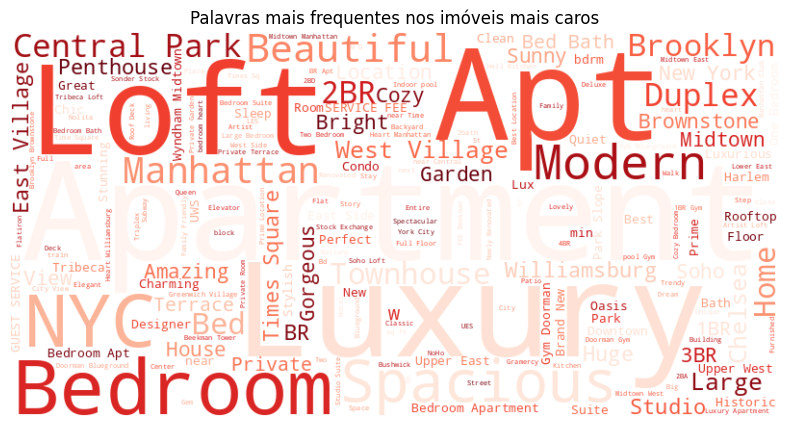

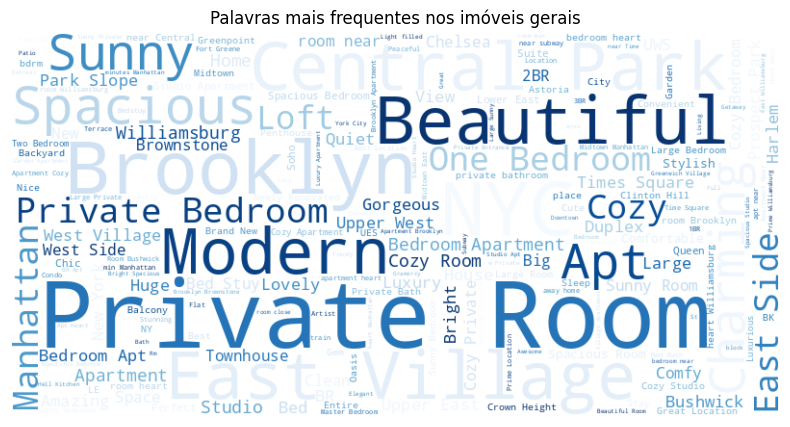

In [26]:
# Olhando somente o top 10% dos dados
percentil_90 = df_tratado['price'].quantile(0.9)
df_caros = df_tratado[df_tratado['price'] >= percentil_90]

# Concatenar todos os nomes dos imóveis mais caros
texto_caros = remover_stopwords(" ".join(df_caros['nome'].dropna()), stop_words_custom)
texto_normais = remover_stopwords(" ".join(df_tratado['nome'].dropna()), stop_words_custom)

# Nuvem de palavras mais frequentes
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(texto_caros)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palavras mais frequentes nos imóveis mais caros")
plt.show()

# Nuvem de palavras mais frequentes
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(texto_normais)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palavras mais frequentes nos imóveis gerais")
plt.show()

In [27]:
# Palavras mais comuns
palavras_caros = texto_caros.split()
contagem_palavras_caros = Counter(palavras_caros)
palavras = texto_normais.split()
contagem_palavras = Counter(palavras)

print("Top 10 palavras mais frequentes em nomes de imóveis mais caros:")
print(contagem_palavras_caros.most_common(10))
print("\nTop 10 palavras mais frequentes em nomes de imóveis comuns:")
print(contagem_palavras.most_common(10))

Top 10 palavras mais frequentes em nomes de imóveis mais caros:
[('Bedroom', 389), ('Luxury', 350), ('Village', 319), ('Apartment', 313), ('Loft', 292), ('Park', 281), ('Manhattan', 273), ('East', 262), ('Apt', 256), ('NYC', 252)]

Top 10 palavras mais frequentes em nomes de imóveis comuns:
[('Private', 4975), ('Room', 4815), ('room', 4165), ('Bedroom', 4125), ('Cozy', 3820), ('Apartment', 3636), ('Brooklyn', 3475), ('bedroom', 2851), ('Spacious', 2778), ('Studio', 2709)]


Olhando agora somente as palavras mais comuns em imoveis caros que no resto do dataset

In [28]:
# Um vetor TF-IDF geral e outro para top 10%
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_all = vectorizer.fit_transform(df['nome'].dropna())
tfidf_caros = vectorizer.transform(df_caros['nome'].dropna())

# Calcular a diferença no TF-IDF entre os imóveis caros e o restante
tfidf_all_sum = np.array(tfidf_all.sum(axis=0)).flatten()
tfidf_caros_sum = np.array(tfidf_caros.sum(axis=0)).flatten()

importancia_palavras = tfidf_caros_sum / (tfidf_all_sum + 1e-5)

# Obter as palavras mais importantes para os imóveis caros
indices_importantes = importancia_palavras.argsort()[::-1]
palavras_importantes = np.array(vectorizer.get_feature_names_out())[indices_importantes]

print("Top 10 palavras mais frequentes nos imóveis mais caros, mas raras no restante do dataset:")
for palavra in palavras_importantes[:10]:
    print(palavra)

Top 10 palavras mais frequentes nos imóveis mais caros, mas raras no restante do dataset:
beekman
superbowl
bluebird
san
dapper
5ppl
regis
marathon
3bath
incentra


# 3. Regressão

Para prever o preço o ideal é usar uma regressão linear pois se pretende prever uma variavel continua que é o preço, ao testar Linear Regression, Decision Tree Regression, Random Forest Regression, o melhor resultado foi de Random Forest Regression

As variaveis utilizadas vão ser todas as variaveis numericas originais (com exceção de id e host_id) e as variveis categoricas (bairro,região e tipo de quarto). Além delas, também vou criar uma variavel que diz respeito a popularidade por bairro e o preço medio por bairro
Vou retirar o variavel de ultimo review

As medidas de perfomance vão ser RMSE, MAE e R². Pois penalizam mais erros e são boas de interpretar.


## Ajuste nos dados

In [53]:
# Preparação dos dados
df_reg = df_tratado.copy()
df_reg['listings_por_bairro'] = df_reg.groupby('bairro')['id'].transform('count')
df_reg = df_reg.drop(columns=['id','host_id','nome'])

# Variaveis novas
df_reg['preco_medio_bairro'] = df_reg.groupby('bairro')['price'].transform('mean')
df_reg['reviews_por_disponibilidade'] = df_reg['numero_de_reviews'] / (df_reg['disponibilidade_365'] + 1)

In [54]:
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(df_reg)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
bairro_group,object,0.000000,0,,,1 rare categories: ['Staten Island']. Group them into a single category or drop the categories.
bairro,object,0.000000,0,,,Possible high cardinality column with 221 unique values: Use hash encoding or text embedding to reduce dimension.
latitude,float64,0.000000,NA,40.499790,40.913060,Column has 425 outliers greater than upper bound (40.87) or lower than lower bound(40.58). Cap them or remove them.
longitude,float64,0.000000,NA,-74.244420,-73.712990,Column has 2832 outliers greater than upper bound (-73.87) or lower than lower bound(-74.05). Cap them or remove them.
room_type,object,0.000000,0,,,No issue
price,float64,0.000000,NA,0.000000,10000.000000,Column has 2972 outliers greater than upper bound (334.00) or lower than lower bound(-90.00). Cap them or remove them.
minimo_noites,float64,0.000000,NA,1.000000,1250.000000,Column has 6607 outliers greater than upper bound (11.00) or lower than lower bound(-5.00). Cap them or remove them.
numero_de_reviews,float64,0.000000,NA,0.000000,629.000000,Column has 6021 outliers greater than upper bound (58.50) or lower than lower bound(-33.50). Cap them or remove them.
ultima_review,object,0.000000,3,,,No issue
reviews_por_mes,float64,0.000000,NA,0.000000,58.500000,Column has 3312 outliers greater than upper bound (3.89) or lower than lower bound(-2.27). Cap them or remove them.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
bairro_group,object,0.0,0,,,1 rare categories: ['Staten Island']. Group them into a single category or drop the categories.
bairro,object,0.0,0,,,Possible high cardinality column with 221 unique values: Use hash encoding or text embedding to reduce dimension.
latitude,float64,0.0,NA,40.49979,40.91306,Column has 425 outliers greater than upper bound (40.87) or lower than lower bound(40.58). Cap them or remove them.
longitude,float64,0.0,NA,-74.24442,-73.71299,Column has 2832 outliers greater than upper bound (-73.87) or lower than lower bound(-74.05). Cap them or remove them.
room_type,object,0.0,0,,,No issue
price,float64,0.0,NA,0.0,10000.0,Column has 2972 outliers greater than upper bound (334.00) or lower than lower bound(-90.00). Cap them or remove them.
minimo_noites,float64,0.0,NA,1.0,1250.0,Column has 6607 outliers greater than upper bound (11.00) or lower than lower bound(-5.00). Cap them or remove them.
numero_de_reviews,float64,0.0,NA,0.0,629.0,Column has 6021 outliers greater than upper bound (58.50) or lower than lower bound(-33.50). Cap them or remove them.
ultima_review,object,0.0,3,,,No issue
reviews_por_mes,float64,0.0,NA,0.0,58.5,Column has 3312 outliers greater than upper bound (3.89) or lower than lower bound(-2.27). Cap them or remove them.


In [55]:
df_clean = df_reg.copy()

# Tratamento de latitude
lower_lat, upper_lat = 40.58, 40.87
df_clean['latitude'] = df_clean['latitude'].clip(lower_lat, upper_lat)

# Tratamento de longitude
lower_lon, upper_lon = -74.05, -73.87
df_clean['longitude'] = df_clean['longitude'].clip(lower_lon, upper_lon)

# Tratamento de minimo_noites
lower_nights, upper_nights = 1, 11  # Definindo 1 como mínimo para evitar valores negativos
df_clean['minimo_noites'] = df_clean['minimo_noites'].clip(lower_nights, upper_nights)

# Tratamento de numero_de_reviews
lower_reviews, upper_reviews = 0, 58  # Definindo 0 como mínimo para evitar valores negativos
df_clean['numero_de_reviews'] = df_clean['numero_de_reviews'].clip(lower_reviews, upper_reviews)

# Tratamento de reviews_por_mes
lower_rpm, upper_rpm = 0, 3.89  # Definindo 0 como mínimo para evitar valores negativos
df_clean['reviews_por_mes'] = df_clean['reviews_por_mes'].clip(lower_rpm, upper_rpm)

# Tratamento de calculado_host_listings_count
lower_hlc, upper_hlc = 1, 3  # Definindo 1 como mínimo
df_clean['calculado_host_listings_count'] = df_clean['calculado_host_listings_count'].clip(lower_hlc, upper_hlc)

# Tratamento de preco_medio_bairro
lower_pmb, upper_pmb = 10.27, 246.60
df_clean['preco_medio_bairro'] = df_clean['preco_medio_bairro'].clip(lower_pmb, upper_pmb)

# Tratamento de reviews_por_disponibilidade
lower_rpd, upper_rpd = 0, 4.63  # Definindo 0 como mínimo para evitar valores negativos
df_clean['reviews_por_disponibilidade'] = df_clean['reviews_por_disponibilidade'].clip(lower_rpd, upper_rpd)

# Para o bairro (alta cardinalidade), criar encoding
df_clean['bairro_encoded'] = pd.factorize(df_clean['bairro'])[0]

# Removendo de ultima_review
df_clean = df_clean.drop('ultima_review', axis=1)

In [56]:
for i in df_clean.columns:
    if df_clean[i].dtype == "object":
        df_clean[i]=df_clean[i].astype('category').cat.codes

In [57]:
df_clean.dtypes

,0
bairro_group,int8
bairro,int16
latitude,float64
longitude,float64
room_type,int8
price,float64
minimo_noites,float64
numero_de_reviews,float64
reviews_por_mes,float64
calculado_host_listings_count,float64


In [58]:
X = df_clean.drop(columns=['price'])
y = df_clean['price']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
#Install the LinearRegression model to predict the cost
linear=LinearRegression()
#fit the model to the train data
linear.fit(x_train,y_train)
linear_pred=linear.predict(x_test)
linear_pred

array([108.52349221,  98.95983584,  97.23931345, ..., 285.3789995 ,
       197.3720572 , 167.44379291])

In [61]:
acc_lr=linear.score(x_test,y_test)
print(linear.score(x_test,y_test))
print(linear.score(x_train,y_train))

0.11122739711099605
0.11460054184542023


In [62]:
%matplotlib inline

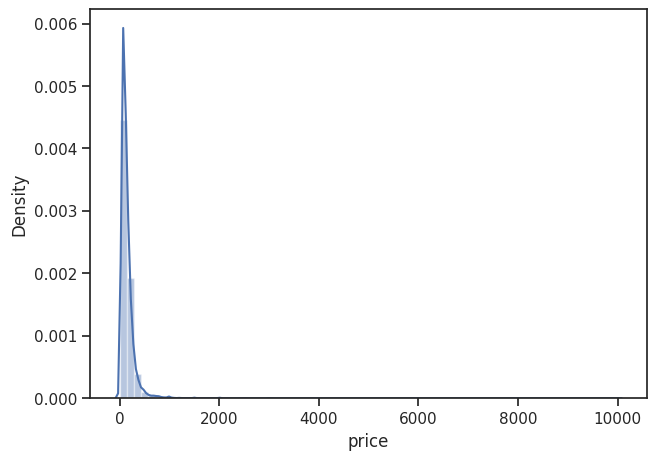

In [63]:
sns.distplot(df_clean['price'], bins=70)
plt.show()

## Testando modelos

In [64]:
X = df_clean.drop(columns=['price'])
y = df_clean['price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model: Linear Regression
R^2: 0.11122739711099605
Mean Squared Error: 44355.148187213126
Mean Absolute Error: 69.07151500646742


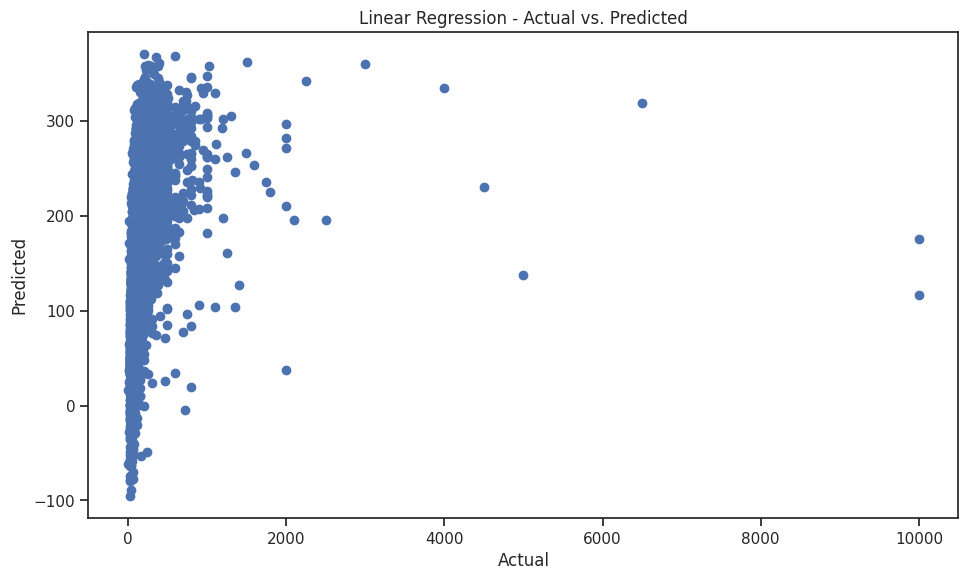

Model: Decision Tree Regression
R^2: 0.06736434226836263
Mean Squared Error: 46544.18089497745
Mean Absolute Error: 66.60354842838699


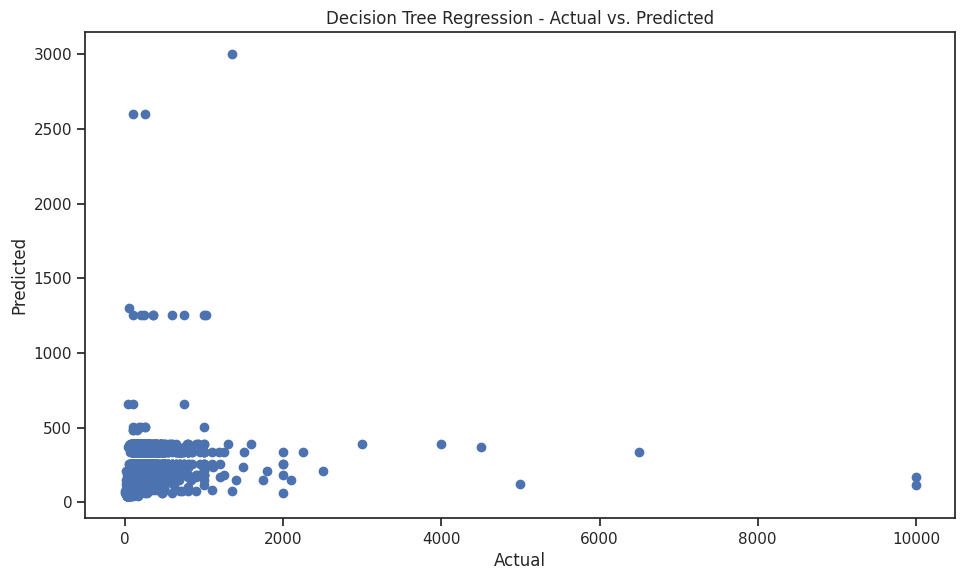

Model: Random Forest Regression
R^2: 0.12038572986125806
Mean Squared Error: 43898.091787223704
Mean Absolute Error: 64.55450788170079


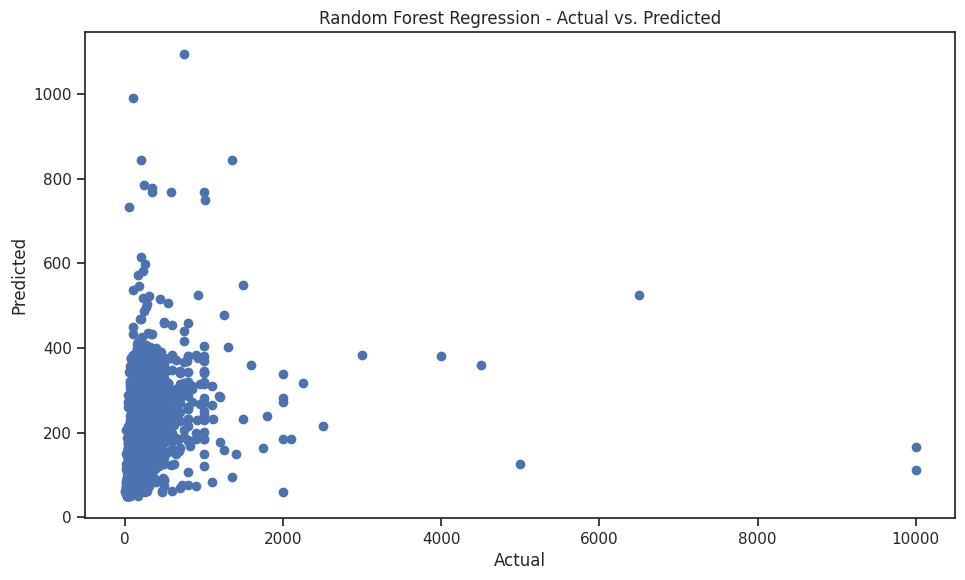

In [66]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=5),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, max_depth=5)
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print('Model:', name)
    print('R^2:', r2)
    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.title(f'{name} - Actual vs. Predicted')
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# 4. Novas previsões

In [68]:
novo_dado = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

In [70]:
# Converter para DataFrame
df_novo = pd.DataFrame([novo_dado])

# Aplicar transformações
df_novo['listings_por_bairro'] = df_clean.groupby('bairro')['bairro'].transform('count')
df_novo['preco_medio_bairro'] = df_clean.groupby('bairro')['price'].transform('mean')
df_novo['reviews_por_disponibilidade'] = df_novo['numero_de_reviews'] / (df_novo['disponibilidade_365'] + 1)

# Aplicar os mesmos cortes
df_novo['latitude'] = df_novo['latitude'].clip(40.58, 40.87)
df_novo['longitude'] = df_novo['longitude'].clip(-74.05, -73.87)
df_novo['minimo_noites'] = df_novo['minimo_noites'].clip(1, 11)
df_novo['numero_de_reviews'] = df_novo['numero_de_reviews'].clip(0, 58)
df_novo['reviews_por_mes'] = df_novo['reviews_por_mes'].clip(0, 3.89)
df_novo['calculado_host_listings_count'] = df_novo['calculado_host_listings_count'].clip(1, 3)
df_novo['preco_medio_bairro'] = df_novo['preco_medio_bairro'].clip(10.27, 246.60)
df_novo['reviews_por_disponibilidade'] = df_novo['reviews_por_disponibilidade'].clip(0, 4.63)

# Criar um dicionário de mapeamento baseado no df_clean
bairro_mapping = {bairro: code for code, bairro in enumerate(df_clean['bairro'].unique())}

# Aplicar a mesma codificação ao novo dado
df_novo['bairro_encoded'] = df_novo['bairro'].map(bairro_mapping)

# Se o bairro não estiver no conjunto de treino, atribuir um valor padrão (-1)
df_novo['bairro_encoded'] = df_novo['bairro_encoded'].fillna(-1)

# Remover colunas irrelevantes
df_novo = df_novo.drop(columns=['id', 'host_id', 'nome', 'ultima_review', 'host_name'])

# Converter variáveis categóricas para numéricas
for col in df_novo.select_dtypes(include='object'):
    df_novo[col] = df_novo[col].astype('category').cat.codes

# Previsão
preco_previsto = models['Decision Tree Regression'].predict(df_novo)

print(f'Preço previsto: {preco_previsto[0]:.2f}')

Preço previsto: 390.27


# 5. Testando com o treino em .pkl

In [45]:
import joblib

# Salvar o modelo treinado em um arquivo .pkl
#joblib.dump(models['Decision Tree Regression'], 'decision_tree_model.pkl')

#print("Modelo salvo como decision_tree_model.pkl")

Modelo salvo como decision_tree_model.pkl


In [71]:
# Carregar o modelo salvo
modelo_carregado = joblib.load('decision_tree_model.pkl')

# Fazer uma previsão com os novos dados
preco_previsto = modelo_carregado.predict(df_novo)

print(f'Preço previsto: {preco_previsto[0]:.2f}')

Preço previsto: 230.39
